In [23]:
import time
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

## Backtracking Algoritma for graph coloring

In [24]:
def is_safe(graph, v, color, c):
    for i in range(len(graph)):
        if graph[v][i] == 1 and color[i] == c:
            return False
    return True

def graph_coloring_backtracking_util(graph, m, color, v):
    if v == len(graph):
        return True

    for c in range(1, m + 1):
        if is_safe(graph, v, color, c):
            color[v] = c
            if graph_coloring_backtracking_util(graph, m, color, v + 1):
                return True
            color[v] = 0

    return False

def graph_coloring_backtracking(graph, m):
    color = [0] * len(graph)
    if not graph_coloring_backtracking_util(graph, m, color, 0):
        return None
    return color


## Greedy Algoritma for graph coloring

In [25]:
def graph_coloring_greedy(graph):
    n = len(graph)
    color = [-1] * n
    color[0] = 0
    for u in range(1, n):
        available = [True] * n
        for i in range(n):
            if graph[u][i] == 1 and color[i] != -1:
                available[color[i]] = False
        color[u] = next(cr for cr in range(n) if available[cr])
    return color

## Pendekatan Matriks

In [29]:
def generate_adjacency_matrix():
    adj_matrix = np.array([
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
    ])
    return adj_matrix


In [27]:
def visualize_graph(adj_matrix, colors, title):
    if colors is None:
        print(f"{title}: No valid coloring found.")
        return
    G = nx.Graph()
    for i in range(len(adj_matrix)):
        for j in range(i + 1, len(adj_matrix)):
            if adj_matrix[i][j] == 1:
                G.add_edge(i, j)
    color_map = [colors[i] for i in range(len(colors))]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=color_map, cmap=plt.cm.tab10, node_size=800)
    plt.title(title)
    plt.show()

## Perbandingan dari hasil Greedy dan Backtracking

Backtracking Colors: [1, 2, 3, 1, 2, 3, 1, 2, 3, 1]
Backtracking Execution Time (s): 8.130073547363281e-05


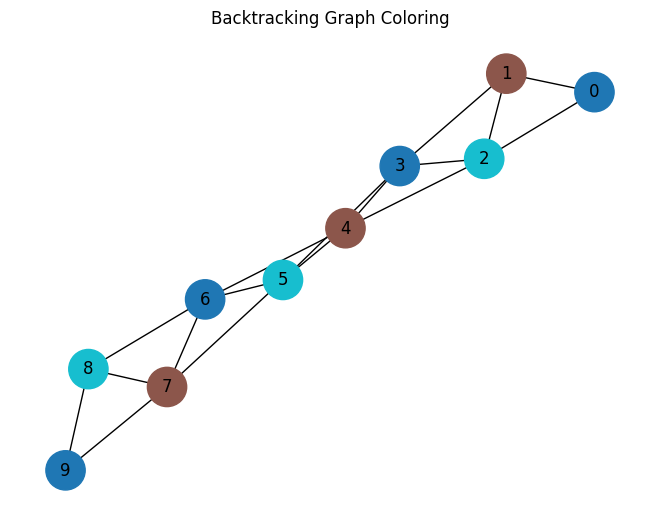

Greedy Colors: [0, 1, 2, 0, 1, 2, 0, 1, 2, 0]
Greedy Execution Time (s): 9.679794311523438e-05


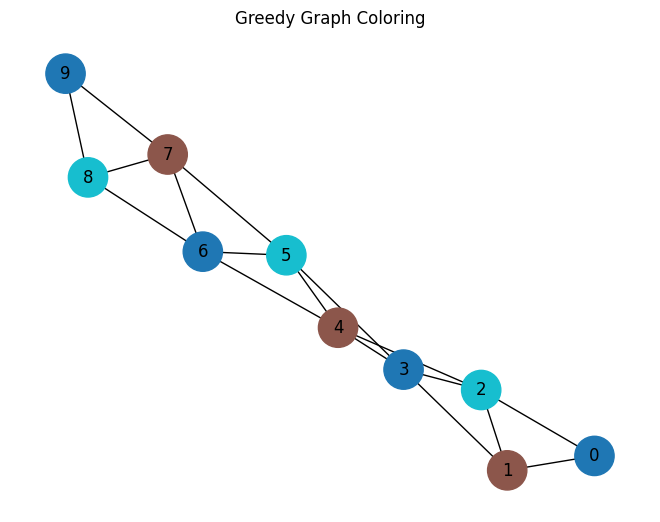

      Algorithm  Colors Used  Execution Time (s)
0  Backtracking            3            0.000081
1        Greedy            3            0.000097


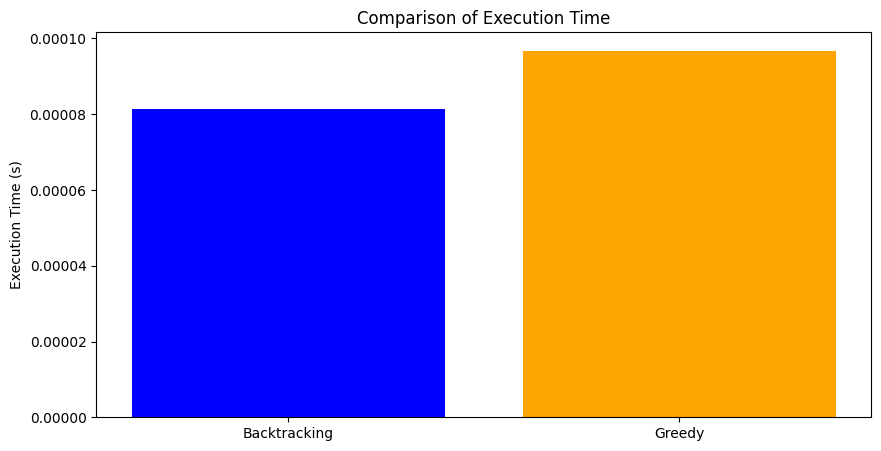

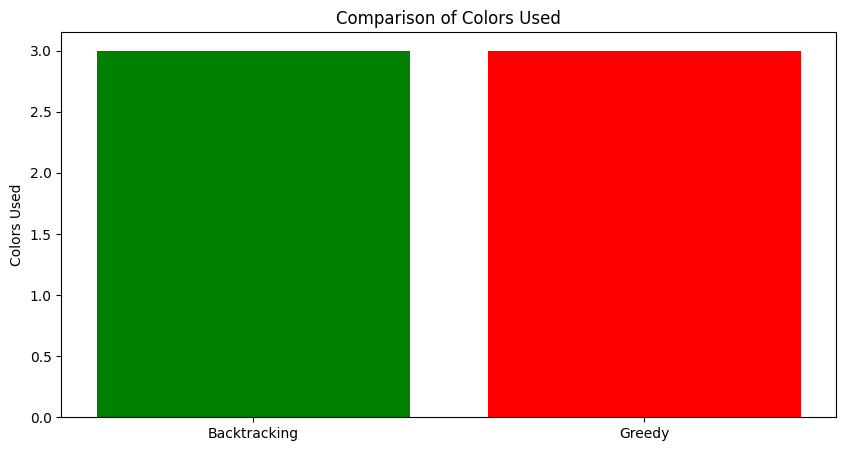

In [28]:
def compare_algorithms():
    adj_matrix = generate_adjacency_matrix()

    # Backtracking
    start_time = time.time()
    backtracking_colors = graph_coloring_backtracking(adj_matrix, 4)
    backtracking_time = time.time() - start_time

    if backtracking_colors:
        print("Backtracking Colors:", backtracking_colors)
    print("Backtracking Execution Time (s):", backtracking_time)
    visualize_graph(adj_matrix, backtracking_colors, "Backtracking Graph Coloring")

    # Greedy
    start_time = time.time()
    greedy_colors = graph_coloring_greedy(adj_matrix)
    greedy_time = time.time() - start_time

    print("Greedy Colors:", greedy_colors)
    print("Greedy Execution Time (s):", greedy_time)
    visualize_graph(adj_matrix, greedy_colors, "Greedy Graph Coloring")

    # Results Table
    results = pd.DataFrame({
        "Algorithm": ["Backtracking", "Greedy"],
        "Colors Used": [len(set(backtracking_colors)) if backtracking_colors else None, len(set(greedy_colors))],
        "Execution Time (s)": [backtracking_time, greedy_time]
    })
    print(results)

    # Visualizations
    plt.figure(figsize=(10, 5))
    plt.bar(results["Algorithm"], results["Execution Time (s)"], color=['blue', 'orange'])
    plt.ylabel("Execution Time (s)")
    plt.title("Comparison of Execution Time")
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.bar(results["Algorithm"], results["Colors Used"], color=['green', 'red'])
    plt.ylabel("Colors Used")
    plt.title("Comparison of Colors Used")
    plt.show()

# Run Comparison
compare_algorithms()
